In [110]:
import tensorflow
tensorflow.__version__

'2.17.1'

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
dataset = pd.read_csv("employee.csv")
dataset.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [113]:
dataset['left'].value_counts()/len(dataset)

,count
left,
0,0.761917
1,0.238083


In [114]:
dataset.nunique()

,0
satisfaction_level,92
last_evaluation,65
number_project,6
average_montly_hours,215
time_spend_company,8
Work_accident,2
promotion_last_5years,2
department,10
salary,3
left,2


In [115]:
dataset.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department', 'salary', 'left'],
      dtype='object')

In [116]:
dataset.dtypes


,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
promotion_last_5years,int64
department,object
salary,object
left,int64


In [117]:
categoricals = ['Work_accident','promotion_last_5years', 'department', 'salary']

In [118]:
for col in categoricals:
    dataset[col]= dataset[col].astype("category")

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   promotion_last_5years  14999 non-null  category
 7   department             14999 non-null  category
 8   salary                 14999 non-null  category
 9   left                   14999 non-null  int64   
dtypes: category(4), float64(2), int64(4)
memory usage: 762.5 KB


In [119]:
dataset.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000


In [120]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [121]:
df = dataset.copy()

In [122]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,left,Work_accident_1,promotion_last_5years_1,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,1,False,False,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,1,False,False,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,1,False,False,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,1,False,False,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,1,False,False,False,False,False,False,False,False,True,False,False,True,False


**Train-Test split**

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X = df.drop("left", axis=1, inplace=False).values
X

array([[0.38, 0.53, 2, ..., False, True, False],
       [0.8, 0.86, 5, ..., False, False, True],
       [0.11, 0.88, 7, ..., False, False, True],
       ...,
       [0.37, 0.53, 2, ..., False, True, False],
       [0.11, 0.96, 6, ..., False, True, False],
       [0.37, 0.52, 2, ..., False, True, False]], dtype=object)

In [125]:
X.shape

(14999, 18)

In [126]:
y = df['left'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=500)


In [128]:
X_train.shape

(11999, 18)

In [129]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [130]:
scaler = StandardScaler()

In [131]:
X_train= scaler.fit_transform(X_train)

X_test  = scaler.transform(X_test )

In [132]:
X_train

array([[ 0.42457559, -0.79730715,  0.16300478, ..., -0.47277248,
         1.01672455, -0.86434249],
       [-2.06204425,  0.60345986,  1.78817666, ..., -0.47277248,
         1.01672455, -0.86434249],
       [-0.13691922,  0.72019044,  0.16300478, ..., -0.47277248,
         1.01672455, -0.86434249],
       ...,
       [ 0.90585684, -1.38096007, -0.64958116, ..., -0.47277248,
        -0.98355056,  1.15694879],
       [-2.06204425,  0.72019044,  1.78817666, ..., -0.47277248,
         1.01672455, -0.86434249],
       [-1.01926819, -1.1474989 , -1.4621671 , ...,  2.11518234,
         1.01672455, -0.86434249]])

In [133]:
import tensorflow as tf
from tensorflow import keras

In [134]:
from tensorflow.keras import layers

In [135]:
def build_model():
    model = keras.Sequential(name="my_classification_model")
    model.add(layers.Input(shape=(X_train.shape[1],))) # this is the shape of each sample!
    model.add(layers.Dense(units = 20, activation = 'relu', name="first_layer"))
    model.add(layers.Dense(units = 8, activation = 'relu', name="second_layer"))

    #output layer
    model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [136]:
model = build_model()
build_model().summary()

Model: "my_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 20)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557 (2.18 KB)

 Trainable params: 557 (2.18 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128)


Epoch 1/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7535 - loss: 0.5262 - val_accuracy: 0.7693 - val_loss: 0.4452
Epoch 2/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.4052 - val_accuracy: 0.8460 - val_loss: 0.3644
Epoch 3/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8655 - loss: 0.3289 - val_accuracy: 0.8907 - val_loss: 0.2965
Epoch 4/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9007 - loss: 0.2737 - val_accuracy: 0.9103 - val_loss: 0.2488
Epoch 5/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9164 - loss: 0.2393 - val_accuracy: 0.9200 - val_loss: 0.2202
Epoch 6/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9328 - loss: 0.2063 - val_accuracy: 0.9313 - val_loss: 0.2023
Epoch 7/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9379 - loss: 0.1915 - val_accuracy: 0.9357 - val_loss: 0.1918
Epoch 8/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9409 - loss: 0.1884 - val_accuracy: 0.9353 - v

In [138]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

,accuracy,loss,val_accuracy,val_loss
395,0.974331,0.079709,0.965333,0.132647
396,0.974248,0.079647,0.966333,0.132846
397,0.973498,0.079682,0.964000,0.133887
398,0.974081,0.079697,0.964000,0.133472
399,0.974164,0.079751,0.963333,0.135328


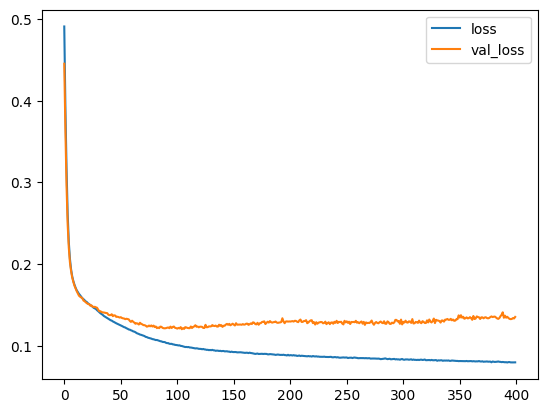

In [139]:
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

After around **100 epochs** the validation loss stops decreasing and starts increasing slightly or stabilizing, while the training loss continues to
decrease. so This behavior is a clear sign of overfitting.


**1. Early stopping!**


In [140]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [141]:
early_stopping   = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
model_checkpoint = ModelCheckpoint(monitor='val_loss', save_best_only=True, filepath="model_checkpoint.keras")
callback_list    = [early_stopping,model_checkpoint]

In [142]:
model = build_model()
model.summary()

Model: "my_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 20)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557 (2.18 KB)

 Trainable params: 557 (2.18 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128,
          callbacks=callback_list)

Epoch 1/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6940 - loss: 0.5654 - val_accuracy: 0.7623 - val_loss: 0.4396
Epoch 2/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7824 - loss: 0.4098 - val_accuracy: 0.8190 - val_loss: 0.3739
Epoch 3/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8364 - loss: 0.3464 - val_accuracy: 0.8603 - val_loss: 0.3211
Epoch 4/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8778 - loss: 0.2972 - val_accuracy: 0.8933 - val_loss: 0.2735
Epoch 5/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9029 - loss: 0.2570 - val_accuracy: 0.9160 - val_loss: 0.2348
Epoch 6/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9263 - loss: 0.2201 - val_accuracy: 0.9387 - val_loss: 0.2059
Epoch 7/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.2004 - val_accuracy: 0.9430 - val_loss: 0.1862
Epoch 8/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9473 - loss: 0.1752 - val_accuracy: 0.9440 - v

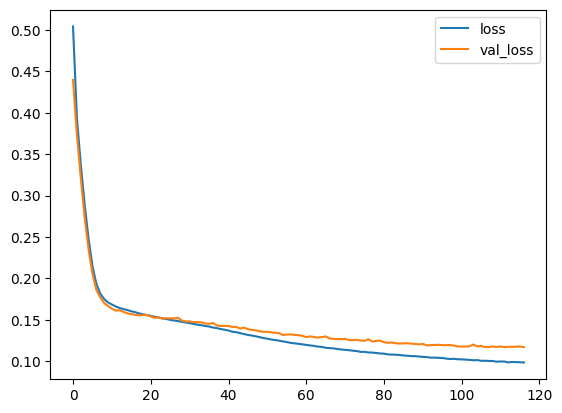

In [144]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

**2. Drop out**

In [145]:
def build_model_with_dropout():
    model = keras.Sequential(name="my_classification_model_with_Dropout")
    model.add(layers.Input(shape=(X_train.shape[1],))) # this is the shape of each sample!
    model.add(layers.Dense(units = 20, activation = 'relu', name="first_layer"))
    model.add(layers.Dropout(rate=0.5)) # 50% of nuerons will be randomly dropped out.

    model.add(layers.Dense(units = 8, activation = 'relu', name="second_layer"))
    model.add(layers.Dropout(rate=0.5))

    #output layer
    model.add(layers.Dense(units = 1, activation = 'sigmoid', name="output_layer"))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [146]:
model_with_dropout = build_model_with_dropout()
model_with_dropout.summary()

Model: "my_classification_model_with_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 20)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 557 (2.18 KB)

 Trainable params: 557 (2.18 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
model_with_dropout.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=400, batch_size=128,
          callbacks=callback_list)

Epoch 1/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7137 - loss: 0.6345 - val_accuracy: 0.7593 - val_loss: 0.5009
Epoch 2/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7542 - loss: 0.5410 - val_accuracy: 0.7580 - val_loss: 0.4555
Epoch 3/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7673 - loss: 0.4976 - val_accuracy: 0.7580 - val_loss: 0.4248
Epoch 4/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7653 - loss: 0.4660 - val_accuracy: 0.7617 - val_loss: 0.3967
Epoch 5/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7654 - loss: 0.4459 - val_accuracy: 0.7713 - val_loss: 0.3738
Epoch 6/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7729 - loss: 0.4155 - val_accuracy: 0.7830 - val_loss: 0.3568
Epoch 7/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7748 - loss: 0.3919 - val_accuracy: 0.7993 - val_loss: 0.3419
Epoch 8/400
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7741 - loss: 0.4033 - val_accuracy: 0.8107 - v

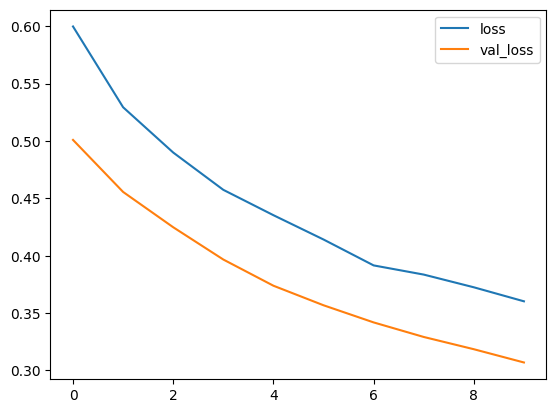

In [148]:
loss_df_with_dropout = pd.DataFrame(model_with_dropout.history.history)
loss_df_with_dropout[['loss', 'val_loss']].plot(legend=True)
plt.show()

In [149]:
model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9652 - loss: 0.1157


[0.11695291101932526, 0.9643333554267883]

In [150]:
model_with_dropout.evaluate(X_test, y_test)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8363 - loss: 0.2978


[0.30697745084762573, 0.8270000219345093]

**Model Predictions**


In [151]:
y_test_probs = model_with_dropout.predict(X_test)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [152]:
y_test_probs

array([[3.7339860e-01],
       [3.3494178e-04],
       [3.6609656e-04],
       ...,
       [7.5263605e-02],
       [8.7429641e-04],
       [9.6337467e-02]], dtype=float32)

In [153]:
predictions = pd.DataFrame({"y_test":y_test, "y_test_probs":y_test_probs.reshape(-1,)})
predictions['y_test_predictions']= np.where(predictions['y_test_probs']>0.5,1,0)
predictions.head()

,y_test,y_test_probs,y_test_predictions
0,0,0.373399,0
1,0,0.000335,0
2,0,0.000366,0
3,0,0.045299,0
4,0,0.060276,0


In [154]:
from sklearn.metrics import classification_report, confusion_matrix


In [155]:
print(classification_report(y_true= predictions.y_test, y_pred=predictions.y_test_predictions) )


              precision    recall  f1-score   support

           0       0.82      0.99      0.90      2274
           1       0.90      0.32      0.47       726

    accuracy                           0.83      3000
   macro avg       0.86      0.65      0.68      3000
weighted avg       0.84      0.83      0.79      3000



In [156]:
print(confusion_matrix(y_true= predictions.y_test, y_pred=predictions.y_test_predictions) )


[[2249   25]
 [ 494  232]]


In [157]:
from tensorflow.keras.models import load_model


In [158]:
model.save('my_DNN_classification.h5')
model_with_dropout.save('my_DNN_withDropout_classification.h5')

In [159]:
loaded_model = load_model('my_DNN_classification.h5')
loaded_model_with_Dropout = load_model('my_DNN_withDropout_classification.h5')

In [160]:
loaded_model.summary()

Model: "my_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 20)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559 (2.19 KB)

 Trainable params: 557 (2.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [161]:
loaded_model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[5.7510487e-03],
       [1.9579001e-04],
       [1.7367132e-02],
       ...,
       [6.2369299e-01],
       [4.1034780e-03],
       [4.6771956e-03]], dtype=float32)

In [162]:
loaded_model_with_Dropout.summary()


Model: "my_classification_model_with_Dropout"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 20)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559 (2.19 KB)

 Trainable params: 557 (2.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [163]:
loaded_checkpoint = load_model("model_checkpoint.keras")
loaded_checkpoint.summary()

Model: "my_classification_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 20)                  │             380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 8)                   │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,116 (4.36 KB)

 Trainable params: 557 (2.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 559 (2.19 KB)